Name: Sathish Kumar Rajendiran
Chapter :  POS Tagging and Introduction to Machine Learning
Date: 10/23/2020
Week: 4

In [1]:
#import libraries

# standard library
import os
import sys
from datetime import datetime
import time

# csv, xls, pandas & json
import pandas as pd
import json
import csv
import xlrd

# Language Processing
import nltk
from nltk import FreqDist

# web requests
from urllib import request


##  Regular Expression to match non-alphabetic characters
import re

os.getcwd()

'/Users/sathishrajendiran/ist664-nlp'

## Running Parsers with Context Free Grammars

In [2]:
grammar = nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP | V NP PP
PP -> P NP
V -> "saw" | "ate" | "walked"
NP -> Prop | Det Nom
Prop -> "John" | "Mary" | "Bob" 
Nom -> N | N PP
Det -> "a" | "an" | "the" | "my"
N -> "man" | "dog" | "cat" | "telescope" | "park"
P -> "in" | "on" | "by" | "with"
""")

In [3]:
# top-down parsing
rd_parser = nltk.RecursiveDescentParser(grammar)
# rd_parser

In [4]:
senttext = "Mary saw Bob"
sentlist = senttext.split()
trees = rd_parser.parse(sentlist)

In [5]:
treelist = list(trees)
type(treelist[0]) 
for tree in treelist:
    print (tree)

(S (NP (Prop Mary)) (VP (V saw) (NP (Prop Bob))))


In [6]:
sent2list = "John saw the man in the park with a telescope".split()
for tree in rd_parser.parse(sent2list):
    print (tree)


(S
  (NP (Prop John))
  (VP
    (V saw)
    (NP
      (Det the)
      (Nom
        (N man)
        (PP
          (P in)
          (NP
            (Det the)
            (Nom
              (N park)
              (PP (P with) (NP (Det a) (Nom (N telescope)))))))))))
(S
  (NP (Prop John))
  (VP
    (V saw)
    (NP (Det the) (Nom (N man)))
    (PP
      (P in)
      (NP
        (Det the)
        (Nom (N park) (PP (P with) (NP (Det a) (Nom (N telescope)))))))))
(S
  (NP (Prop John))
  (VP
    (V saw)
    (NP
      (Det the)
      (Nom (N man) (PP (P in) (NP (Det the) (Nom (N park))))))
    (PP (P with) (NP (Det a) (Nom (N telescope))))))


In [7]:
groucho_grammar = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked" | "shot"
  NP -> Pronoun | Prop | Det N | Det N PP
  Prop -> "John" | "Mary" | "Bob"
  Pronoun -> "I"
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park" | "elephant" | "pajamas"
  P -> "in" | "on" | "by" | "with"
  """)

In [8]:
sent4list = "I shot an elephant in my pajamas".split()
rd_parser = nltk.RecursiveDescentParser(groucho_grammar)
for tree in rd_parser.parse(sent4list):
    print (tree)

(S
  (NP (Pronoun I))
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))
(S
  (NP (Pronoun I))
  (VP
    (V shot)
    (NP (Det an) (N elephant))
    (PP (P in) (NP (Det my) (N pajamas)))))


In [9]:
flight_grammar = nltk.CFG.fromstring("""
  S -> NP VP | VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked" | "shot" | "book"
  NP -> Prop | Det N | Det N PP
  Prop -> "John" | "Mary" | "Bob" | "I"
  Det -> "a" | "an" | "the" | "my" | "that"
  N -> "man" | "dog" | "cat" | "telescope" | "park" | "elephant" | "pajamas" | "flight"
  P -> "in" | "on" | "by" | "with"
  """)

In [10]:
rd_parser = nltk.RecursiveDescentParser(flight_grammar)
sent5list = 'book that flight'.split()
for tree in rd_parser.parse(sent5list):
    print (tree)

(S (VP (V book) (NP (Det that) (N flight))))


# Lab Week 5 
Text for Lab Question

In [11]:
# extend the flight grammar:
actual_flight_grammar = nltk.CFG.fromstring("""
  S -> NP VP | VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked" | "shot" | "book"
  NP -> Prop | Det N | Det N PP
  Prop -> "John" | "Mary" | "Bob" | "I"
  Det -> "a" | "an" | "the" | "my" | "that"
  N -> "man" | "dog" | "cat" | "telescope" | "park" | "elephant" | "pajamas" | "flight"
  P -> "in" | "on" | "by" | "with" | "I"
  """)

In [12]:
# Define sentences for the question
sentex1 = "I prefer a flight through Houston".split()
sentex2 = "Jack walked with the dog".split()
sentex3 = "John gave the dog a bone".split()
sentex4 = "I want to book that flight".split()

In [13]:
# extend the flight grammar:
flight_grammar = nltk.CFG.fromstring("""
  S -> NP VP | VP 
  VP -> V NP | V NP PP | V PP | V TO VP | V NP NP
  NP -> Prop | Det N | Det N PP 
  PP -> P NP 
  V -> "saw" | "ate" | "walked" | "shot"  | "prefer" |"gave" |"want" | "book"
  Prop -> "John" | "Mary" | "Bob"  | "Jack" | "Houston" | "I"
  Det -> "a" | "an" | "the" | "my" | "that" 
  N -> "man" | "dog" | "cat" | "telescope" | "park" | "elephant" | "pajamas" | "flight" | "bone" 
  P -> "in" | "on" | "by" | "with" | "through" 
  TO -> "to"
  """)

In [14]:
# I prefer a flight through Houston

# redefine rd_parser when you change the flight grammar
rd_parser = nltk.RecursiveDescentParser(flight_grammar)
for tree in rd_parser.parse(sentex1):   
    print (tree)

(S
  (NP (Prop I))
  (VP
    (V prefer)
    (NP (Det a) (N flight) (PP (P through) (NP (Prop Houston))))))
(S
  (NP (Prop I))
  (VP
    (V prefer)
    (NP (Det a) (N flight))
    (PP (P through) (NP (Prop Houston)))))


In [15]:
# Jack walked with the dog
# redefine rd_parser when you change the flight grammar
rd_parser = nltk.RecursiveDescentParser(flight_grammar)
for tree in rd_parser.parse(sentex2):   
    print (tree)

(S
  (NP (Prop Jack))
  (VP (V walked) (PP (P with) (NP (Det the) (N dog)))))


In [16]:
# John gave the dog a bone
# redefine rd_parser when you change the flight grammar
rd_parser = nltk.RecursiveDescentParser(flight_grammar)
for tree in rd_parser.parse(sentex3):   
    print (tree)

(S
  (NP (Prop John))
  (VP (V gave) (NP (Det the) (N dog)) (NP (Det a) (N bone))))


In [17]:
# I want to book that flight
# redefine rd_parser when you change the flight grammar
rd_parser = nltk.RecursiveDescentParser(flight_grammar)
for tree in rd_parser.parse(sentex4):   
    print (tree)

(S
  (NP (Prop I))
  (VP (V want) (TO to) (VP (V book) (NP (Det that) (N flight)))))


# Probabilistic Context-Free Grammars and Subcategories of Verbs

In [18]:
prob_grammar = nltk.PCFG.fromstring("""
  S -> NP VP [0.9]| VP  [0.1]
  VP -> TranV NP [0.3]
  VP -> InV  [0.3]
  VP -> DatV NP PP  [0.4]
  PP -> P NP   [1.0]
  TranV -> "saw" [0.2] | "ate" [0.2] | "walked" [0.2] | "shot" [0.2] | "book" [0.2]
  InV -> "ate" [0.5] | "walked" [0.5]
  DatV -> "gave" [0.2] | "ate" [0.2] | "saw" [0.2] | "walked" [0.2] | "shot" [0.2]
  NP -> Prop [0.2]| Det N [0.4] | Det N PP [0.4]
  Prop -> "John" [0.25]| "Mary" [0.25] | "Bob" [0.25] | "I" [0.25] 
  Det -> "a" [0.2] | "an" [0.2] | "the" [0.2] | "my" [0.2] | "that" [0.2]
  N -> "man" [0.15] | "dog" [0.15] | "cat" [0.15] | "park" [0.15] | "telescope" [0.1] | "flight" [0.1] | "elephant" [0.1] | "pajamas" [0.1]
  P -> "in" [0.2] | "on" [0.2] | "by" [0.2] | "with" [0.2] | "through" [0.2]
  """)


In [19]:
viterbi_parser = nltk.ViterbiParser(prob_grammar)
for tree in viterbi_parser.parse(['John', 'saw', 'a', 'telescope']):
    print (tree)


(S
  (NP (Prop John))
  (VP (TranV saw) (NP (Det a) (N telescope)))) (p=2.16e-05)


In [20]:
for tree in viterbi_parser.parse(sent2list):
    print (tree)

(S
  (NP (Prop John))
  (VP
    (DatV saw)
    (NP
      (Det the)
      (N man)
      (PP (P in) (NP (Det the) (N park))))
    (PP (P with) (NP (Det a) (N telescope))))) (p=1.65888e-10)


In [21]:
for tree in viterbi_parser.parse(sent4list):
    print (tree)


(S
  (NP (Prop I))
  (VP
    (DatV shot)
    (NP (Det an) (N elephant))
    (PP (P in) (NP (Det my) (N pajamas))))) (p=4.608e-08)


# Dependency Grammars

In [22]:
groucho_dep_grammar = nltk. DependencyGrammar.fromstring ("""
  'shot' -> 'I' | 'elephant' | 'in'
  'elephant' -> 'an' | 'in'
  'in' -> 'pajamas'
  'pajamas' -> 'my'
  """)


In [23]:
print (groucho_dep_grammar)
pdp = nltk.ProjectiveDependencyParser(groucho_dep_grammar)
glist = 'I shot an elephant in my pajamas'.split()
trees = pdp.parse(glist)
for tree in trees:
    print (tree)


Dependency grammar with 7 productions
  'shot' -> 'I'
  'shot' -> 'elephant'
  'shot' -> 'in'
  'elephant' -> 'an'
  'elephant' -> 'in'
  'in' -> 'pajamas'
  'pajamas' -> 'my'
(shot I (elephant an (in (pajamas my))))
(shot I (elephant an) (in (pajamas my)))


# 5.3 Context-Free Grammars

In [24]:
#CFG Grammer - top down parser

CFG_grammar = nltk.CFG.fromstring("""
S  -> NP VP
VP -> V NP | V NP PP | V PP
NP -> Prop | Det N | Det N PP
PP -> P NP
V  -> "saw" | "ate" | "walked"
Prop -> "John" | "Mary" | "Bob"
Det -> "a" | "an" | "the" | "my"
N -> "man" | "dog" | "cat" | "telescope" | "park"
P -> "in" | "on" | "by" | "with"
""")

In [25]:

sentex5 = 'Bob saw a man in the park with a telescope'.split()

# redefine rd_parser when you change the flight grammar
rd_parser = nltk.RecursiveDescentParser(CFG_grammar)
for tree in rd_parser.parse(sentex5):   
    print (tree)

(S
  (NP (Prop Bob))
  (VP
    (V saw)
    (NP
      (Det a)
      (N man)
      (PP
        (P in)
        (NP
          (Det the)
          (N park)
          (PP (P with) (NP (Det a) (N telescope))))))))
(S
  (NP (Prop Bob))
  (VP
    (V saw)
    (NP (Det a) (N man))
    (PP
      (P in)
      (NP
        (Det the)
        (N park)
        (PP (P with) (NP (Det a) (N telescope)))))))
(S
  (NP (Prop Bob))
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P in) (NP (Det the) (N park))))
    (PP (P with) (NP (Det a) (N telescope)))))


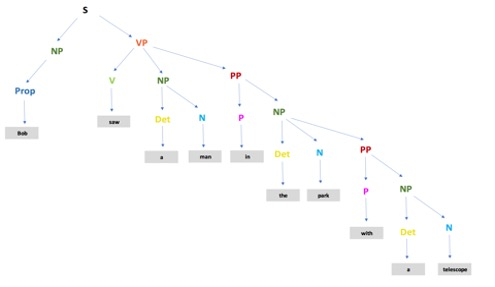

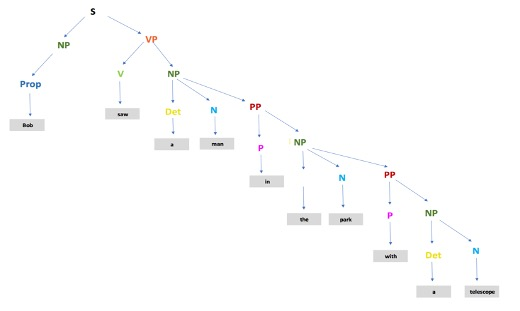


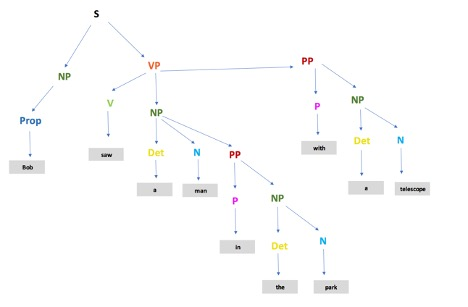

In [26]:
sentex6 = 'the man with a cat saw my dog'.split()

# redefine rd_parser when you change the flight grammar
rd_parser = nltk.RecursiveDescentParser(CFG_grammar)
for tree in rd_parser.parse(sentex6):   
    print (tree)

(S
  (NP (Det the) (N man) (PP (P with) (NP (Det a) (N cat))))
  (VP (V saw) (NP (Det my) (N dog))))


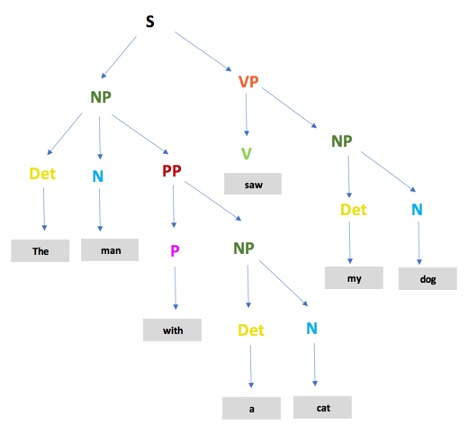

In [27]:
sentex7 = 'John ate in the park'.split()

# redefine rd_parser when you change the flight grammar
rd_parser = nltk.RecursiveDescentParser(CFG_grammar)
for tree in rd_parser.parse(sentex7):   
    print (tree)

(S (NP (Prop John)) (VP (V ate) (PP (P in) (NP (Det the) (N park)))))


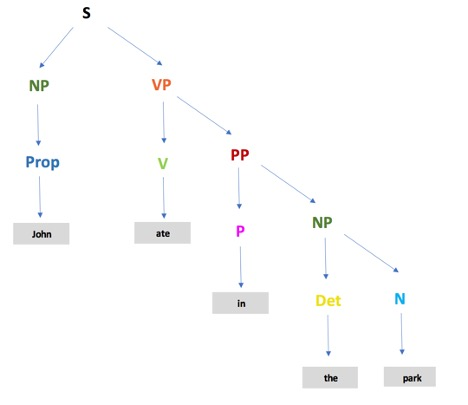